# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [63]:
#pip install citipy


In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib
import seaborn as sns

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [65]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#   print(city)
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [66]:
#OpenweatherMap API Key is in the API_key file

In [67]:
#URL for weatherMap API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
#print(url)

In [68]:
#list of citi data
city_data = []

In [69]:
#print to logger
print("Beggining Data Retrival")
print("----------------------")

#Create counters
record_count = 1
set_count = 1


#loop through all the cities in our list
for i, city in enumerate(cities):
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    #create endpoint url with each cit
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    #print(city_url)
    
    #log the url, record and set numbers
    print (f"Processing Record {record_count} of Set {set_count}) | {city}")
 
    
    #Add 1 to the record count
    record_count += 1
    
    #Run an API request for each of the cities
    try: 
        #parce the JSON and retrive data
        city_weather = requests.get(city_url).json()
        #print(city_weather)
        
        #parce out the max tem, humidity, cloudmess and wind speed
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"] 
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"] 
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #append the city into into city_data
        city_data.append({"City":city,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudness": city_clouds,
                         "Wind speed": city_wind,
                         "Country": city_country,
                         "Date":city_date})
        
# if an error experience, skip the city
    except:
        print("city not found. skipping...")
        pass

#Indicate that Data loading is complete
print("----------end------------")



Beggining Data Retrival
----------------------
Processing Record 1 of Set 1) | attawapiskat
city not found. skipping...
Processing Record 2 of Set 1) | marawi
Processing Record 3 of Set 1) | ushuaia
Processing Record 4 of Set 1) | nikolskoye
Processing Record 5 of Set 1) | sentyabrskiy
city not found. skipping...
Processing Record 6 of Set 1) | rikitea
Processing Record 7 of Set 1) | butaritari
Processing Record 8 of Set 1) | mataura
Processing Record 9 of Set 1) | illoqqortoormiut
city not found. skipping...
Processing Record 10 of Set 1) | nanortalik
Processing Record 11 of Set 1) | atuona
Processing Record 12 of Set 1) | carnarvon
Processing Record 13 of Set 1) | hilo
Processing Record 14 of Set 1) | tura
Processing Record 15 of Set 1) | wanning
Processing Record 16 of Set 1) | khaniotis
Processing Record 17 of Set 1) | hanzhong
Processing Record 18 of Set 1) | saskylakh
Processing Record 19 of Set 1) | bluff
Processing Record 20 of Set 1) | panzhihua
Processing Record 21 of Set 1) 

Processing Record 30 of Set 4) | meulaboh
Processing Record 31 of Set 4) | laguna
Processing Record 32 of Set 4) | pangoa
Processing Record 33 of Set 4) | hambantota
Processing Record 34 of Set 4) | tumannyy
city not found. skipping...
Processing Record 35 of Set 4) | kaeo
Processing Record 36 of Set 4) | santa maria
Processing Record 37 of Set 4) | haines junction
Processing Record 38 of Set 4) | prince george
Processing Record 39 of Set 4) | kruisfontein
Processing Record 40 of Set 4) | pelym
Processing Record 41 of Set 4) | teguldet
Processing Record 42 of Set 4) | lata
Processing Record 43 of Set 4) | madang
Processing Record 44 of Set 4) | dwarka
Processing Record 45 of Set 4) | gulfport
Processing Record 46 of Set 4) | kingman
Processing Record 47 of Set 4) | alyangula
Processing Record 48 of Set 4) | tiznit
Processing Record 49 of Set 4) | cutzamala
city not found. skipping...
Processing Record 0 of Set 5) | gamboma
Processing Record 1 of Set 5) | hayden
Processing Record 2 of S

Processing Record 19 of Set 8) | concepcion del uruguay
Processing Record 20 of Set 8) | kirakira
Processing Record 21 of Set 8) | moron
Processing Record 22 of Set 8) | manado
Processing Record 23 of Set 8) | wanaka
Processing Record 24 of Set 8) | bulgan
Processing Record 25 of Set 8) | sharjah
Processing Record 26 of Set 8) | pangody
Processing Record 27 of Set 8) | havelock
Processing Record 28 of Set 8) | pasighat
Processing Record 29 of Set 8) | sao filipe
Processing Record 30 of Set 8) | letka
Processing Record 31 of Set 8) | labuhan
Processing Record 32 of Set 8) | verkhnyaya inta
Processing Record 33 of Set 8) | valparaiso
Processing Record 34 of Set 8) | gigmoto
Processing Record 35 of Set 8) | sisimiut
Processing Record 36 of Set 8) | chuy
Processing Record 37 of Set 8) | shingu
Processing Record 38 of Set 8) | chake chake
Processing Record 39 of Set 8) | half moon bay
Processing Record 40 of Set 8) | rio gallegos
Processing Record 41 of Set 8) | northam
Processing Record 42

Processing Record 3 of Set 12) | sulina
Processing Record 4 of Set 12) | sambava
Processing Record 5 of Set 12) | artyk
city not found. skipping...
Processing Record 6 of Set 12) | dien bien
city not found. skipping...
Processing Record 7 of Set 12) | sebeta
Processing Record 8 of Set 12) | kristiinankaupunki
Processing Record 9 of Set 12) | tuatapere
Processing Record 10 of Set 12) | nome
Processing Record 11 of Set 12) | kalach-na-donu
Processing Record 12 of Set 12) | crab hill
city not found. skipping...
Processing Record 13 of Set 12) | rancho palos verdes
Processing Record 14 of Set 12) | moranbah
Processing Record 15 of Set 12) | cabra
Processing Record 16 of Set 12) | toba
Processing Record 17 of Set 12) | palabuhanratu
city not found. skipping...
Processing Record 18 of Set 12) | mondovi
Processing Record 19 of Set 12) | askarovo
Processing Record 20 of Set 12) | stephenville
Processing Record 21 of Set 12) | daloa
Processing Record 22 of Set 12) | karasjok
Processing Record 2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [70]:
#convert array of Json into Pandas DF
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudness,Wind speed,Country,Date
0,marawi,7.9986,124.2928,72.95,90,100,2.35,PH,1623294284
1,ushuaia,-54.8000,-68.3000,37.44,99,100,3.20,AR,1623294003
2,nikolskoye,59.7035,30.7861,59.81,80,78,3.02,RU,1623294285
3,rikitea,-23.1203,-134.9692,72.34,64,100,10.40,PF,1623294285
4,butaritari,3.0707,172.7902,83.75,72,75,15.17,KI,1623294285


In [71]:
# Extract relevant field from the FataFrame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudness = city_data_pd["Cloudness"]
wind_speed = city_data_pd["Wind speed"]



In [72]:
#Export cit_data into a csv file
city_data_pd.to_csv(output_data_file, index_label="City_ID")
city_data_pd.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudness,Wind speed,Country,Date
0,marawi,7.9986,124.2928,72.95,90,100,2.35,PH,1623294284
1,ushuaia,-54.8000,-68.3000,37.44,99,100,3.20,AR,1623294003
2,nikolskoye,59.7035,30.7861,59.81,80,78,3.02,RU,1623294285
3,rikitea,-23.1203,-134.9692,72.34,64,100,10.40,PF,1623294285
4,butaritari,3.0707,172.7902,83.75,72,75,15.17,KI,1623294285


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [73]:
#Show record count and describe
city_data_pd.describe()


,Lat,Lng,Max Temp,Humidity,Cloudness,Wind speed,Date
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,20.123632,19.524392,67.472505,69.996317,55.482505,7.470350,1.623294e+09
std,33.280635,91.041806,14.281967,21.122992,39.627174,5.486744,6.936482e+01
min,-54.800000,-179.166700,29.590000,1.000000,0.000000,0.000000,1.623294e+09
25%,-7.779150,-62.728350,56.920000,58.000000,13.500000,3.345000,1.623294e+09
50%,24.255600,25.511200,68.200000,75.000000,64.000000,6.170000,1.623294e+09
75%,48.751750,100.917700,80.255000,86.000000,96.500000,10.000000,1.623294e+09
max,78.218600,179.316700,96.940000,100.000000,100.000000,32.210000,1.623294e+09


In [74]:
print("the maximum humidity value is 100%, so there are no cities with humidity greater than 100% in our dataset")


the maximum humidity value is 100%, so there are no cities with humidity greater than 100% in our dataset


In [75]:
#  Get the indices of cities that have humidity over 100%.
R_test_stats = city_data_pd["Humidity"].describe(include = "all")
R_test_stats

count    543.000000
mean      69.996317
std       21.122992
min        1.000000
25%       58.000000
50%       75.000000
75%       86.000000
max      100.000000
Name: Humidity, dtype: float64

In [76]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudness,Wind speed,Country,Date
0,marawi,7.9986,124.2928,72.95,90,100,2.35,PH,1623294284
1,ushuaia,-54.8000,-68.3000,37.44,99,100,3.20,AR,1623294003
2,nikolskoye,59.7035,30.7861,59.81,80,78,3.02,RU,1623294285
3,rikitea,-23.1203,-134.9692,72.34,64,100,10.40,PF,1623294285
4,butaritari,3.0707,172.7902,83.75,72,75,15.17,KI,1623294285


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

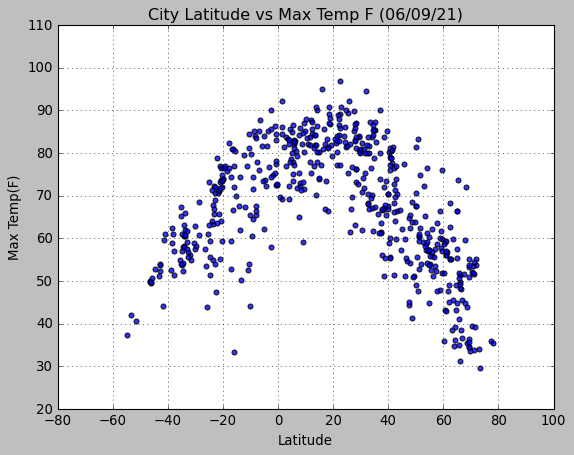

In [77]:
#Build scatter plot for latitude vs Temp
plt.scatter(lats, max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs Max Temp F ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")
plt.grid(True)

#Show the figure
plt.savefig("output_data/Latitude-MaxTemp.png")

#Show the plot
plt.show()

## Latitude vs. Humidity Plot

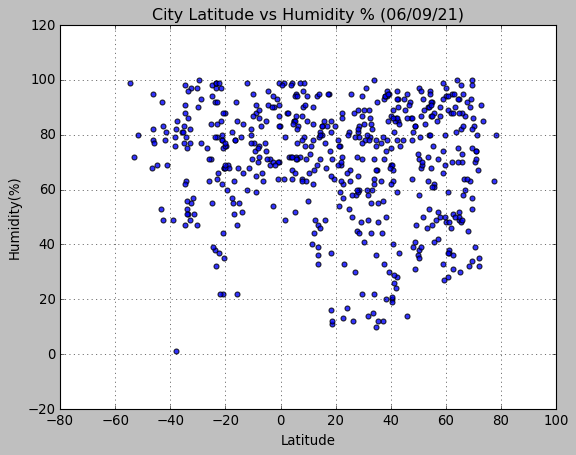

In [78]:
#Build scatter plot for latitude vs Temp
plt.scatter(lats, humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs Humidity % ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)

#Show the figure
plt.savefig("output_data/Latitude-Humidity.png")

#Show the plot
plt.show()

## Latitude vs. Cloudiness Plot

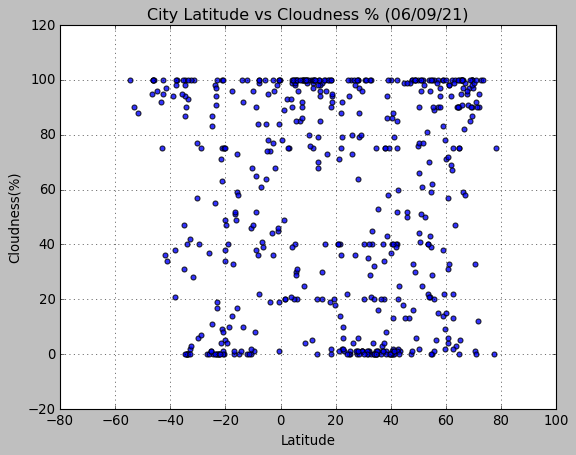

In [79]:
#Build scatter plot for latitude vs Temp
plt.scatter(lats, cloudness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs Cloudness % ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudness(%)")
plt.grid(True)

#Show the figure
plt.savefig("output_data/Latitude-Cloudness.png")

#Show the plot
plt.show()

## Latitude vs. Wind Speed Plot

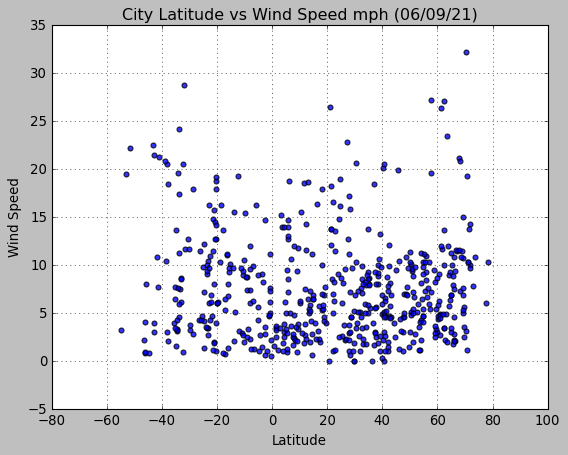

In [80]:
#Build scatter plot for latitude vs Temp
plt.scatter(lats, wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs Wind Speed mph ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

#Show the figure
plt.savefig("output_data/Latitude-WindSpeed.png")

#Show the plot
plt.show()

## Linear Regression

In [81]:
# Create Northern and Southern Hemisphere DataFrames
L=0
Northern = city_data_pd.query(f"Lat >= {L}")
Southern = city_data_pd.query(f"Lat <= {L}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient(R^2) is: -0.7900193352900349


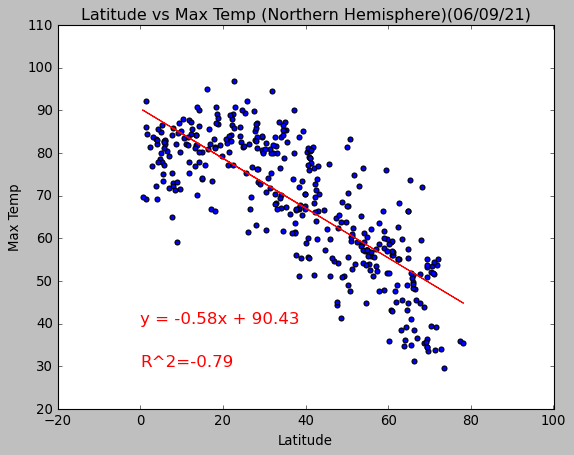

In [82]:
x_values=Northern['Lat']
y_values=Northern['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")

plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Max Temp (Northern Hemisphere)({time.strftime('%x')})")
plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(0,30),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Max Temp (Northern Hemisphere).png")
plt.show()

The graph shows the strong relationship between Temp and Latitude. As far as we from equator in the Northern Hemisphere, the temperature drops. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient(R^2) is: 0.7016991650457252


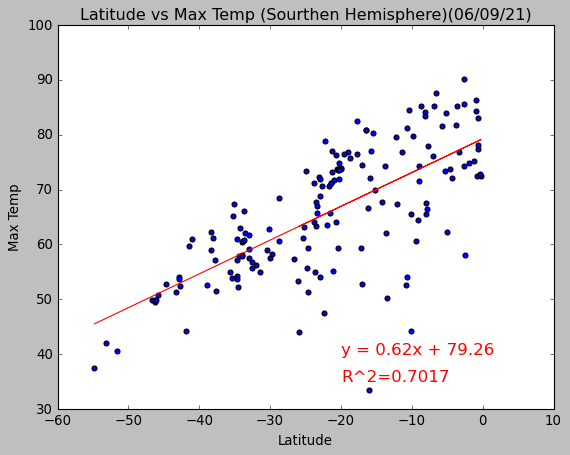

In [83]:
x_values=Southern["Lat"]
y_values=Southern['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")

plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Max Temp (Sourthen Hemisphere)({time.strftime('%x')})")
plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(-20,35),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Max Temp (Southern Hemisphere).png")
plt.show()

For the Southern hemisphere we see the same strong trend. As far as we are from equator, the temperature drops. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: -0.050327779540487796


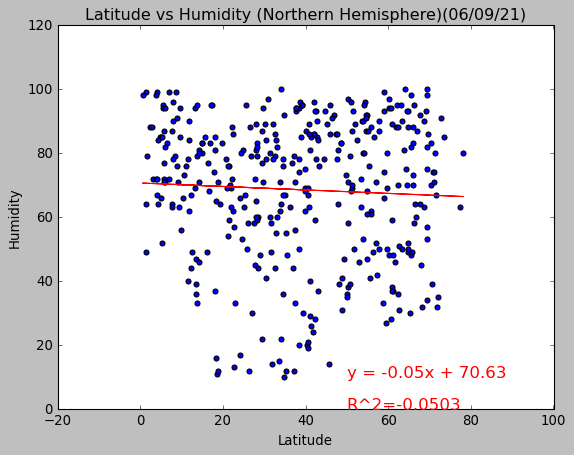

In [84]:
x_values=Northern["Lat"]
y_values=Northern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"Latitude vs Humidity (Northern Hemisphere)({time.strftime('%x')})")

plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(50,0),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Humidity (Northern Hemisphere).png")
plt.show()

in the Northern Hemisphere, as far as we are from equator, the humidity slightly decreses. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: 0.07106917137833348


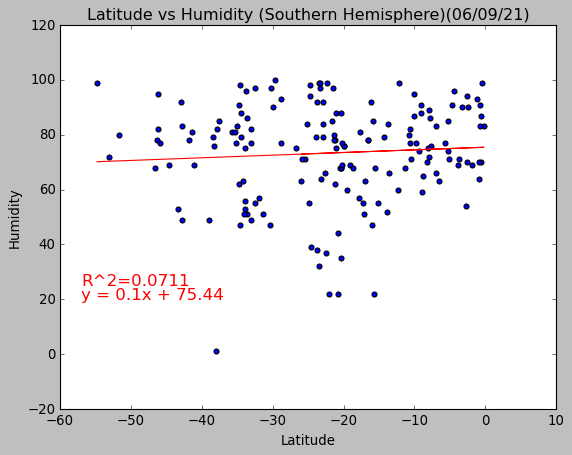

In [85]:
x_values=Southern["Lat"]
y_values=Southern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,20),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f"Latitude vs Humidity (Southern Hemisphere)({time.strftime('%x')})")

plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(-57,25),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Humidity (Southern Hemisphere).png")
plt.show()

In the Southern Hemisphere, as far as we are from equator, the humidity is almost the same, very little increases.  

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: 0.014416753992209985


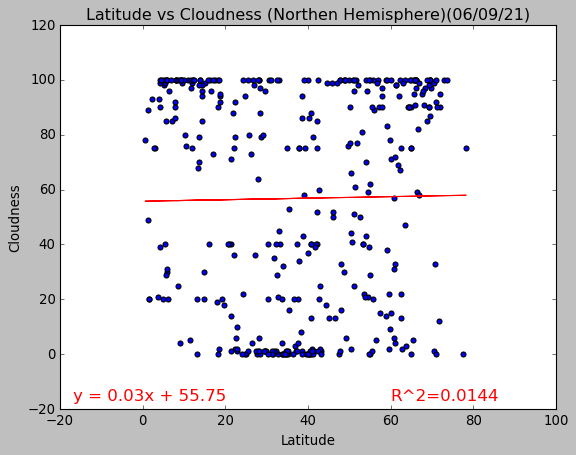

In [86]:
x_values=Northern["Lat"]
y_values=Northern["Cloudness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-17,-17),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudness')
plt.title(f"Latitude vs Cloudness (Northen Hemisphere)({time.strftime('%x')})")

plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(60,-17),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Cloudness (Northern Hemisphere).png")
plt.show()

In the Northern Hemisphere, as far as we are from equator, the cloudness slightly increases. Interestingly, the chances to have a blue sky without clouds are very high at the latitude from 30 to 42. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: -0.10208383879467095


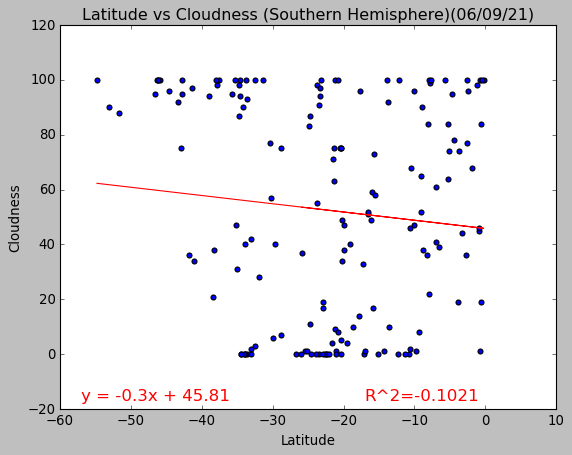

In [87]:
x_values= Southern["Lat"]
y_values= Southern["Cloudness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-57,-17),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudness')
plt.title(f"Latitude vs Cloudness (Southern Hemisphere)({time.strftime('%x')})")
plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(-17,-17),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Cloudness (Southern Hemisphere).png")
plt.show()

In the Southern Hemisphere, cloudness increases as far as we are from equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: 0.12144943227528128


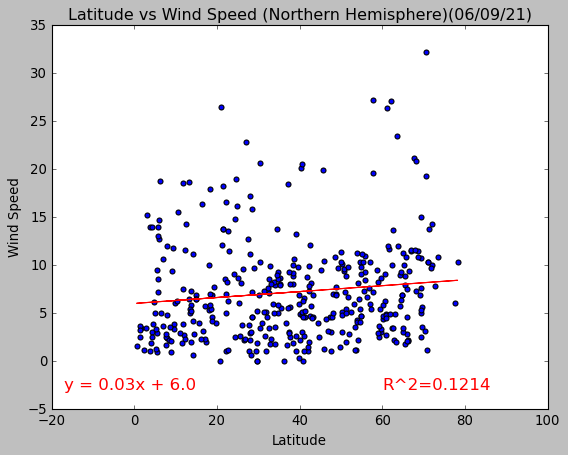

In [88]:
x_values= Northern["Lat"]
y_values= Northern["Wind speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-17,-3),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f"Latitude vs Wind Speed (Northern Hemisphere)({time.strftime('%x')})")
plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(60,-3),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Wind Speed (Northern Hemisphere).png")
plt.show()

This plot shows that in the Northern Hemisphere the wind speed slightly increases along the latitudes.  

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient(R^2) is: -0.2109048338839243


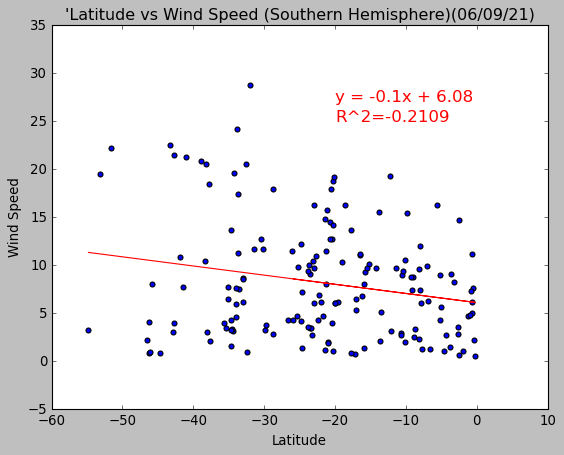

In [90]:
x_values= Southern["Lat"]
y_values= Southern["Wind speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,27),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f"'Latitude vs Wind Speed (Southern Hemisphere)({time.strftime('%x')})")
plt.style.use("classic")

R2="R^2="+str(round(rvalue,4))

plt.annotate(R2,(-20,25),fontsize=15,color="red")
print(f"The correlation coefficient(R^2) is: {rvalue}")
plt.savefig("output_data/Latitude vs Wind Speed (Southern Hemisphere).png")
plt.show()

However, this plot shows that in the Southern Hemisphere the wind is increses as we move away from equator.  